In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
files = [
    "data/outputs/gcnbnk3_crossval_history.csv",
    "data/outputs/gcnbnk5_crossval_history.csv",
    "data/outputs/gcnbnk8_crossval_history.csv",
    "data/outputs/gcnbnk16_crossval_history.csv"
]


In [3]:
avg_metrics_by_epoch = []

for file in files:
    df_hm = pd.read_csv(file)
    # Calcular a média das métricas por época em todos os folds
    df_hm['epoch'] = df_hm.groupby('fold').cumcount() + 1 # Adiciona coluna de época
    
    avg_metrics_by_epoch.append( df_hm.groupby('epoch')[
        ['val_acc', 'val_f1', 'val_precision', 'val_recall']
    ].mean())
    

In [12]:
avg_metrics_by_epoch

[        val_acc    val_f1  val_precision  val_recall
 epoch                                               
 1      0.614994  0.600327       0.627119    0.610358
 2      0.667352  0.663847       0.670269    0.665176
 3      0.693349  0.692302       0.694284    0.692739
 4      0.710883  0.710491       0.712027    0.711210
 5      0.720556  0.720271       0.722187    0.721282
 ...         ...       ...            ...         ...
 236    0.849456  0.849220       0.849488    0.849067
 237    0.848730  0.848489       0.848792    0.848338
 238    0.847521  0.847260       0.847631    0.847069
 239    0.848247  0.848009       0.848331    0.847879
 240    0.849093  0.848858       0.849223    0.848748
 
 [240 rows x 4 columns],
         val_acc    val_f1  val_precision  val_recall
 epoch                                               
 1      0.614631  0.602861       0.625376    0.610123
 2      0.667594  0.665483       0.668413    0.665828
 3      0.692261  0.691350       0.693314    0.691926
 

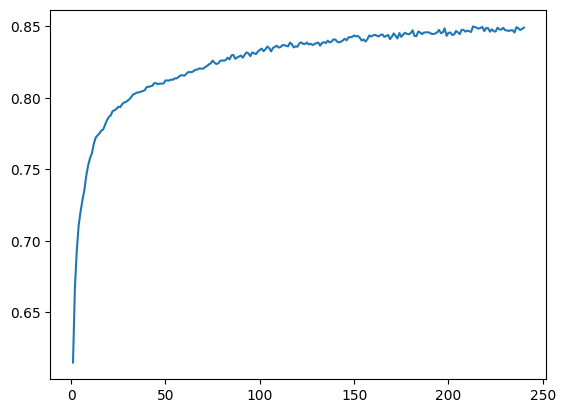

In [13]:
plt.plot(avg_metrics_by_epoch[0]['val_acc'])

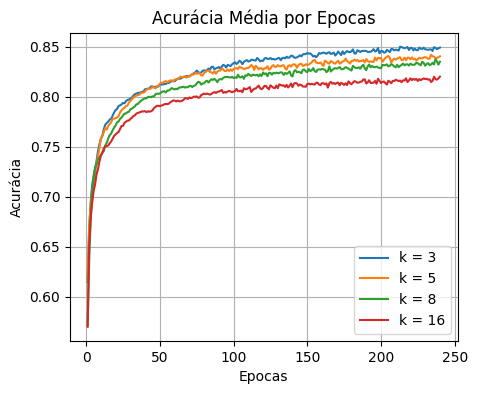

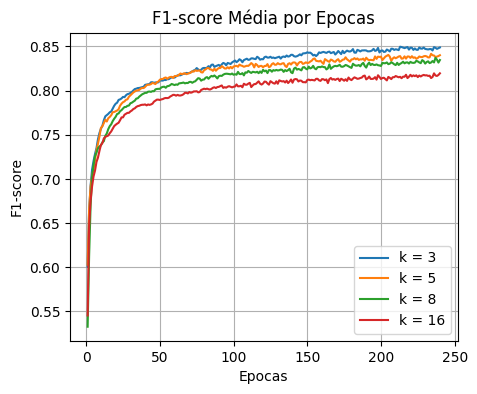

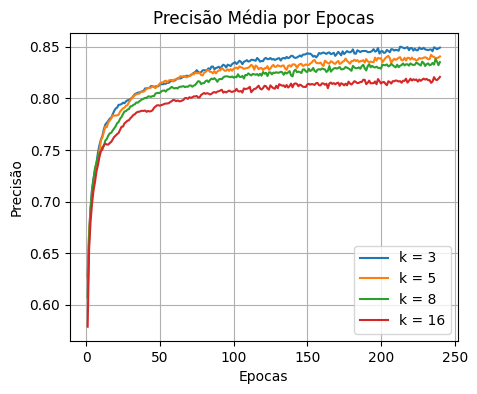

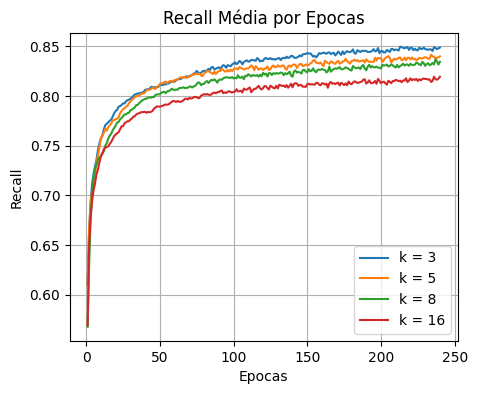

In [4]:
metrics_to_plot = {'Acurácia':'val_acc', 'F1-score':'val_f1', 'Precisão':'val_precision', 'Recall':'val_recall'}

for metric_keys in metrics_to_plot.keys():
    plt.figure(figsize=(5, 4))
    for avg in avg_metrics_by_epoch:
        val_metric = metrics_to_plot[metric_keys]
        plt.plot(avg[val_metric])

    plt.xlabel('Epocas')
    plt.ylabel(metric_keys)
    plt.title(f'{metric_keys} Média por Epocas')
    plt.legend(['k = 3','k = 5', 'k = 8', 'k = 16'])
    plt.grid(True)
    plt.savefig(f"data/outputs/gcnbn_comp_crossval_results_{val_metric}.png")
    plt.show()

In [ ]:
y_score_all = []

for file in files:
    df_hm = pd.read_csv(file)
    # Calcular a média das métricas por época em todos os folds
    df_hm['epoch'] = df_hm.groupby('fold').cumcount() + 1 # Adiciona coluna de época
    
    avg_metrics_by_epoch.append( df_hm.groupby('epoch')[
        ['val_acc', 'val_f1', 'val_precision', 'val_recall']
    ].mean())
    

In [4]:
df_hm = pd.read_csv(files[0])

In [22]:
print(df_hm['test_scores'][0])

[[ 0.18521172  0.445183  ]
 [-0.31850368 -0.35074967]
 [-0.30116343  0.6243675 ]
 ...
 [ 0.0228919   0.40011376]
 [-0.5214202  -0.3722007 ]
 [ 0.3133826   1.0621969 ]]


In [20]:
import numpy as np
import pandas as pd

s = df_hm['test_scores'][0]

# 1. remover colchetes e '...'
clean = s.replace('[', ' ').replace(']', ' ').replace('...', ' ').strip()

# 2. converter em array 1D de floats
arr1d = np.fromstring(clean, sep=' ')

# 3. reshapar para N x 2 (ajuste 2 para o número de colunas desejado)
arr2d = arr1d.reshape(-1, 2)

# 4. criar DataFrame
df = pd.DataFrame(arr2d, columns=['x', 'y'])

print(df)


          x         y
0  0.185212  0.445183
1 -0.318504 -0.350750
2 -0.301163  0.624367
3  0.022892  0.400114
4 -0.521420 -0.372201
5  0.313383  1.062197
